# Liver Disease Prediction

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv('liver_disease_dataset.csv')

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

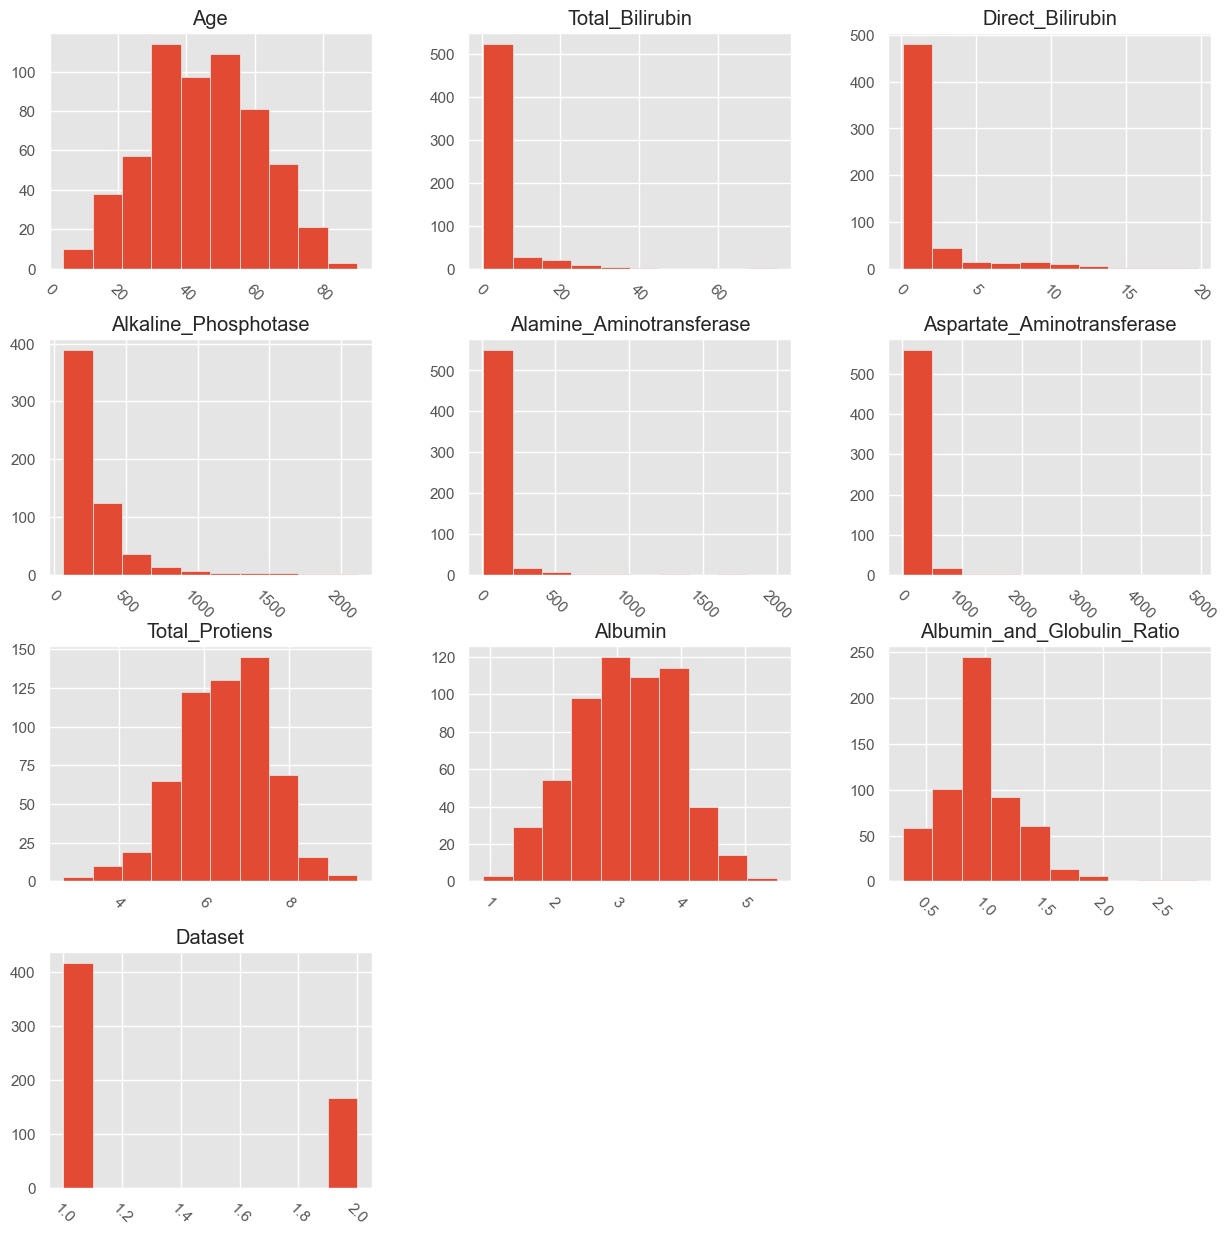

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [9]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [10]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

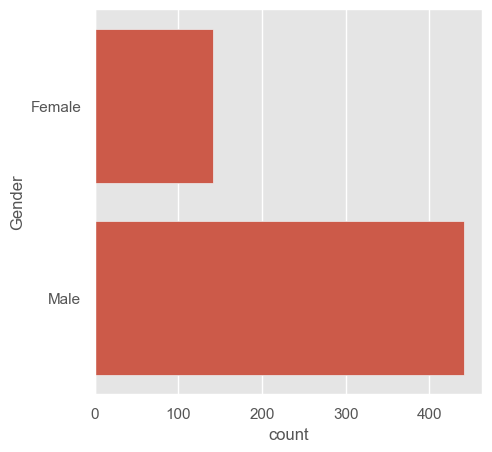

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [12]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


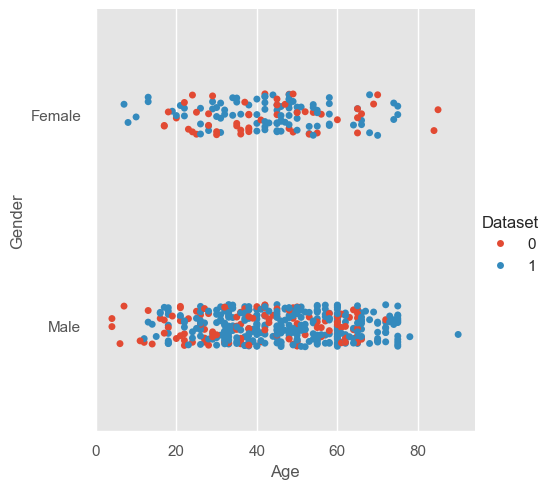

In [13]:
import seaborn as sns

# Replace factorplot with catplot
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df)


Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


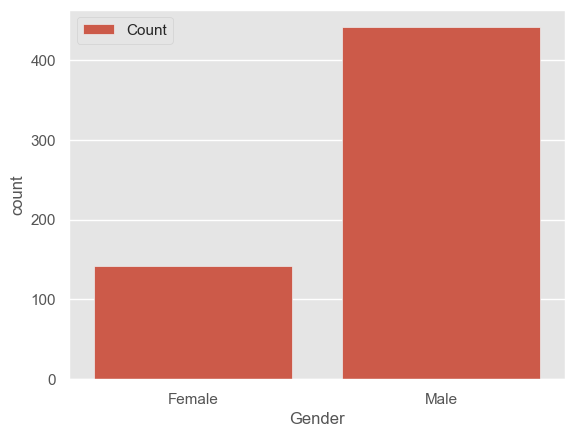

In [14]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [15]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

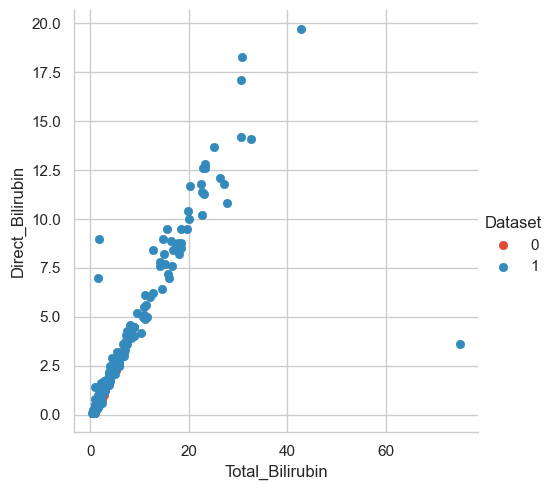

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated code using 'height' instead of 'size'
sns.set_style('whitegrid')  # Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


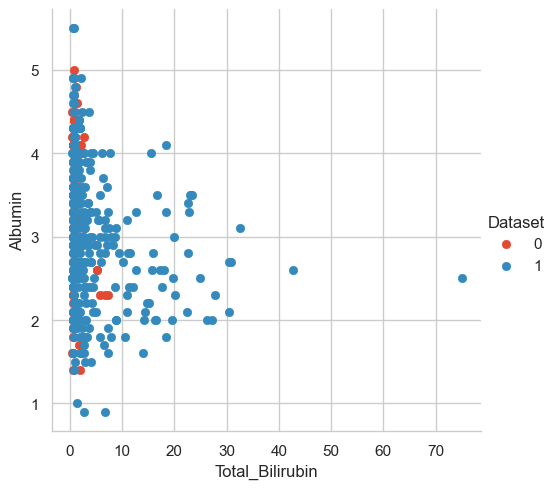

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use 'height' instead of 'size'
sns.set_style('whitegrid')  # Background Grid
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

plt.show()


## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [18]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

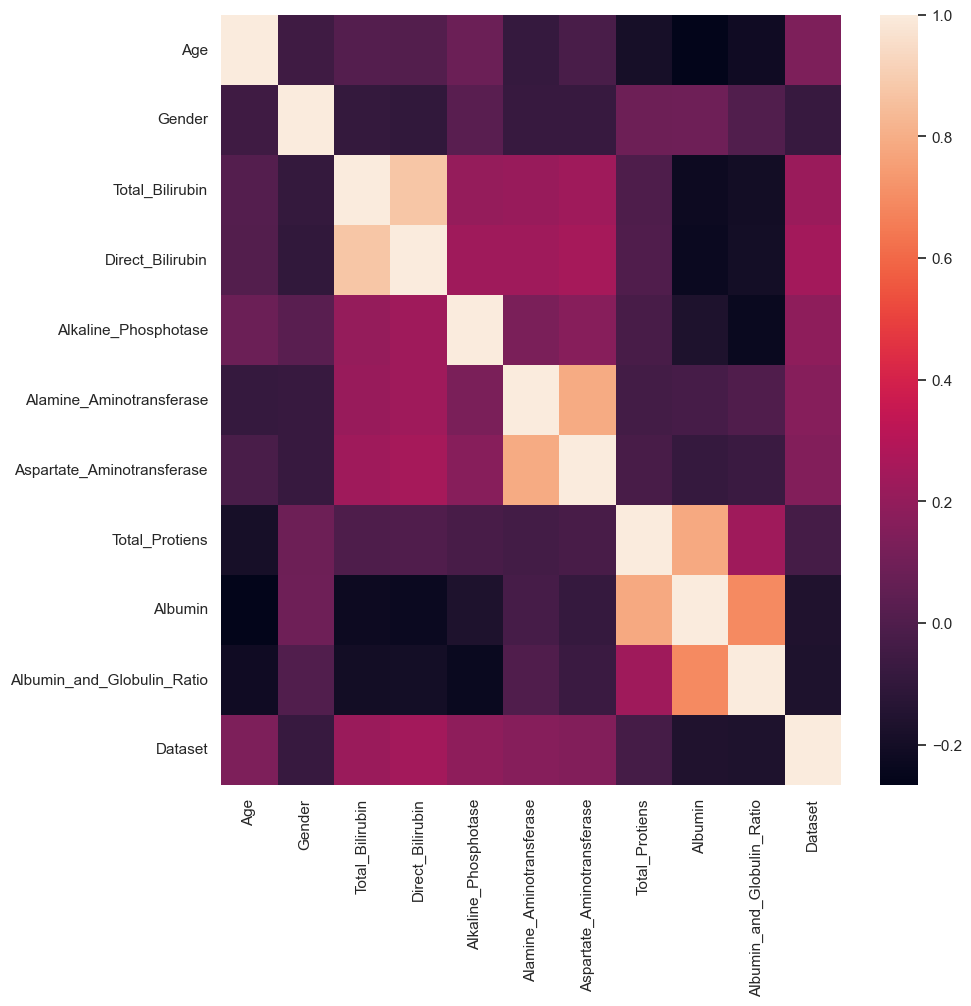

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

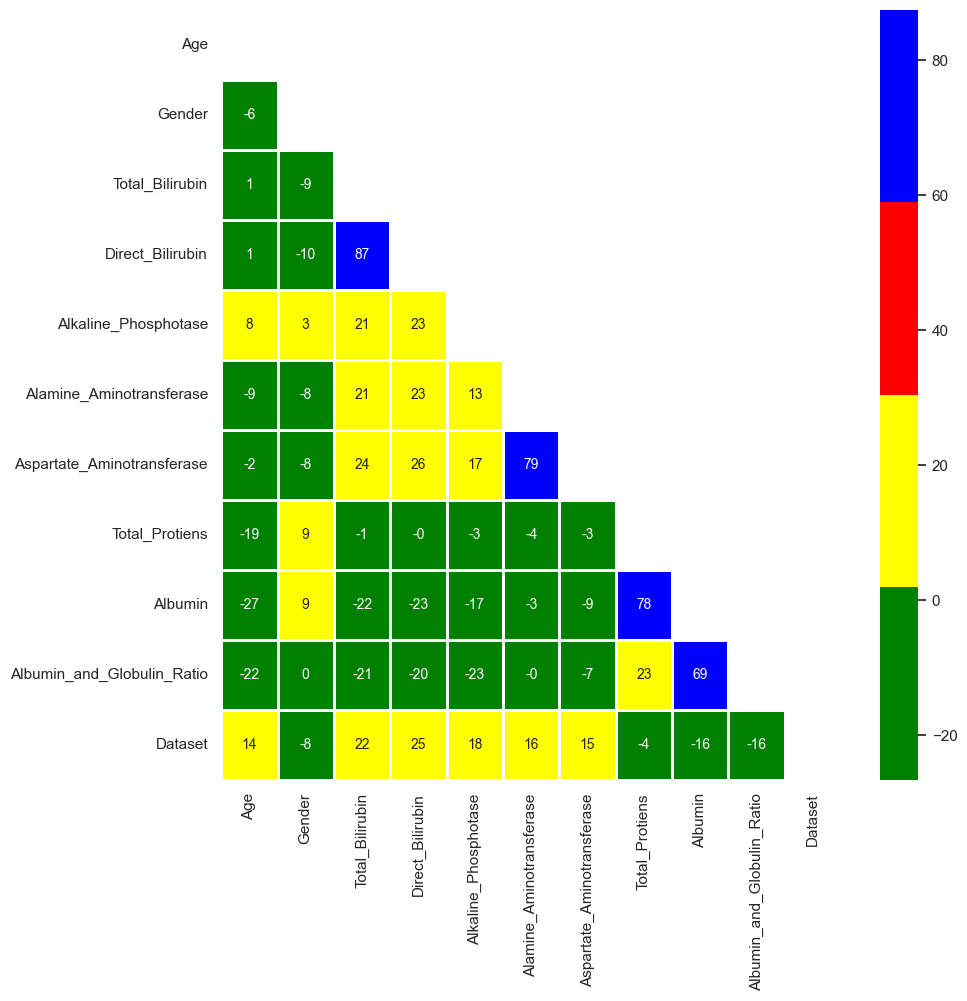

In [20]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [21]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

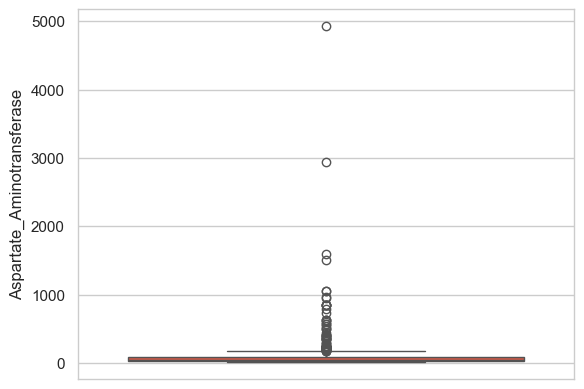

In [22]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [23]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [24]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

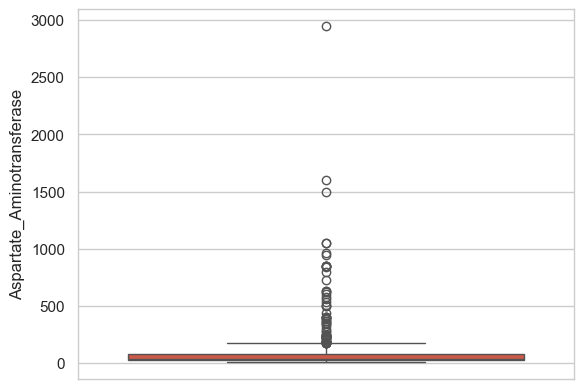

In [25]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [26]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [27]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [28]:
df.isnull().values.any()

True

In [29]:
df=df.dropna(how='any')  

In [30]:
df.shape

(564, 11)

In [31]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [32]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [33]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [34]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(394, 10) (170, 10) (394,) (170,)


### Data standardization

In [35]:
train_mean = X_train.mean()
train_std = X_train.std()

In [36]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [37]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,3.940000e+02,3.940000e+02,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.848493e-16,1.127130e-17,0.000000,3.606816e-17,-6.311928e-17,4.508520e-18,2.028834e-17,2.930538e-16,1.284928e-16,-3.606816e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.609772e+00,-5.473278e-01,-0.457097,-4.967282e-01,-9.478507e-01,-3.999413e-01,-4.728145e-01,-3.285639e+00,-2.750957e+00,-2.057111e+00
25%,-7.944028e-01,-5.473278e-01,-0.396929,-4.623568e-01,-4.750931e-01,-3.207875e-01,-3.922670e-01,-7.312226e-01,-7.405196e-01,-7.644963e-01
50%,1.938343e-02,-5.473278e-01,-0.366846,-4.279853e-01,-3.294669e-01,-2.477225e-01,-3.059663e-01,-1.389277e-03,-1.122579e-01,7.570326e-02
75%,7.705707e-01,-5.473278e-01,-0.111134,-8.427106e-02,4.409605e-02,-9.702594e-02,-7.583080e-02,6.372149e-01,7.673084e-01,5.281184e-01
max,2.460742e+00,1.822421e+00,10.764128,6.240071e+00,7.692639e+00,9.768272e+00,8.669316e+00,2.826715e+00,2.400789e+00,5.052270e+00


In [38]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [39]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,-0.169886,0.107838,-0.065212,-0.062637,0.052364,-0.020612,0.059915,0.284104,0.238829,0.124366
std,1.053615,1.063007,0.800553,0.912979,1.097240,0.818079,0.976194,0.950912,0.985593,1.100236
min,-2.484574,-0.547328,-0.442055,-0.496728,-0.833882,-0.393853,-0.478568,-3.376868,-2.750957,-2.057111
25%,-0.857002,-0.547328,-0.396929,-0.462357,-0.457154,-0.320788,-0.386514,-0.275077,-0.363563,-0.489816
50%,-0.074515,-0.547328,-0.381888,-0.427985,-0.346351,-0.247723,-0.294459,0.454757,0.264699,-0.118189
75%,0.582774,1.822421,-0.216427,-0.170200,0.044096,-0.090937,-0.006790,0.819673,1.018613,0.770484
max,2.773737,1.822421,3.649330,3.868443,6.173061,7.150109,5.504954,2.917944,3.029050,6.021731


# LR

In [40]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
# model predictions

y_pred = lr.predict(X_test)

In [42]:
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7208121827411168
0.6941176470588235


In [43]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 14  35]
 [ 17 104]]


In [44]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.29      0.35        49
           1       0.75      0.86      0.80       121

    accuracy                           0.69       170
   macro avg       0.60      0.57      0.57       170
weighted avg       0.66      0.69      0.67       170



# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
# model predictions 

y_pred = knn.predict(X_test)

In [47]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.7944162436548223
0.6294117647058823


In [48]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[19 30]
 [33 88]]


In [49]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38        49
           1       0.75      0.73      0.74       121

    accuracy                           0.63       170
   macro avg       0.56      0.56      0.56       170
weighted avg       0.64      0.63      0.63       170



# SVM

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [51]:
# best parameters

grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [52]:
# best score 

grid_search.best_score_

0.7132099967543006

In [53]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [54]:
# model predictions 

y_pred = svc.predict(X_test)

In [55]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.7131979695431472
0.711764705882353


In [56]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[  0  49]
 [  0 121]]


In [57]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.71      1.00      0.83       121

    accuracy                           0.71       170
   macro avg       0.36      0.50      0.42       170
weighted avg       0.51      0.71      0.59       170



# DT

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6058823529411764 

Confusion Matrix :- 
[[20 29]
 [38 83]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.34      0.41      0.37        49
           1       0.74      0.69      0.71       121

    accuracy                           0.61       170
   macro avg       0.54      0.55      0.54       170
weighted avg       0.63      0.61      0.61       170



In [59]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [60]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'random'}
0.7406556372549019


In [61]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7385786802030457
Test Accuracy of Decision Tree Classifier is 0.6941176470588235 

Confusion Matrix :- 
[[  1  48]
 [  4 117]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.20      0.02      0.04        49
           1       0.71      0.97      0.82       121

    accuracy                           0.69       170
   macro avg       0.45      0.49      0.43       170
weighted avg       0.56      0.69      0.59       170



# RF

In [62]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=16,
    max_features='sqrt',  # Change 'auto' to 'sqrt' or 'log2'
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=130
)

rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [63]:
y_pred = rand_clf.predict(X_test)

In [64]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9390862944162437
0.6764705882352942


In [65]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[18 31]
 [24 97]]


In [66]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40        49
           1       0.76      0.80      0.78       121

    accuracy                           0.68       170
   macro avg       0.59      0.58      0.59       170
weighted avg       0.66      0.68      0.67       170



# Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [68]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [69]:
# best score

grid_search_gbc.best_score_

0.7307894736842104

In [70]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [71]:
y_pred = gbc.predict(X_test)

In [72]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9416243654822335
0.711764705882353


In [73]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[22 27]
 [22 99]]


In [74]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.45      0.47        49
           1       0.79      0.82      0.80       121

    accuracy                           0.71       170
   macro avg       0.64      0.63      0.64       170
weighted avg       0.70      0.71      0.71       170



# XGBoost

In [75]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 300)

xgb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred = xgb.predict(X_test)

In [77]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9923857868020305
0.6882352941176471


In [78]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 16  33]
 [ 20 101]]


In [79]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        49
           1       0.75      0.83      0.79       121

    accuracy                           0.69       170
   macro avg       0.60      0.58      0.58       170
weighted avg       0.66      0.69      0.67       170



# Model Comparison

In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,71.18
5,Gradient Boosting Classifier,71.18
0,Logistic Regression,69.41
3,Decision Tree Classifier,69.41
6,XgBoost,68.82
4,Random Forest Classifier,67.65
1,KNN,62.94


In [81]:
import pickle
model = svc
pickle.dump(model, open("liver.pkl",'wb'))

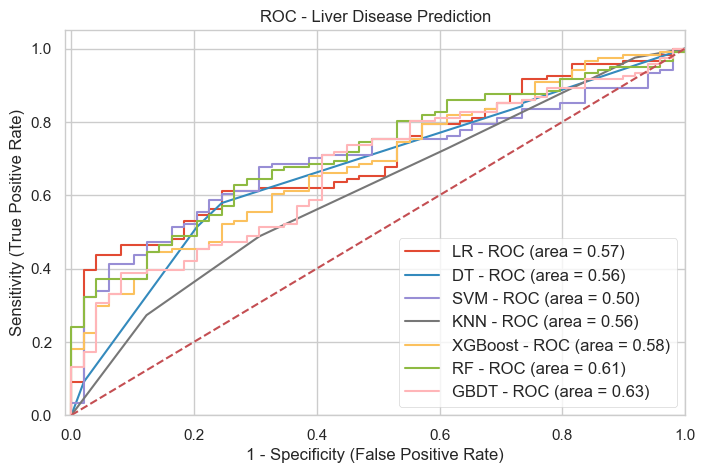

In [82]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("outputs/roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[69.41000000000001, 69.41000000000001, 71.17999999999999, 62.94, 68.82000000000001, 67.65, 71.17999999999999]
[57.26, 56.599999999999994, 50.0, 55.75, 58.06, 61.9, 63.55]


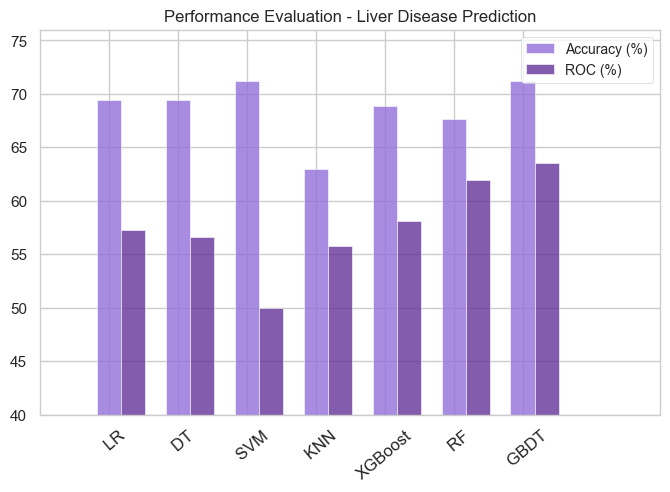

In [83]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 76])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("outputs/PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()